## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize

## Loading data

In [2]:
df = pd.read_csv('BTP.csv')
df.shape

(86, 14)

In [3]:
df.sample(5)

,Dynol,Non ionic,Pushar,Hydrogel,Silica,CTAB,Surface Tension,Contact Angle,Average viscosity,Total area,area without finger,total length,finger length,Effective area
16,0.075,0.0,0.00,0.00000,0.0,0.2,32.20,18.320,0.0980,34.50,23.800000,8.100000,4.033333,1.889785
27,0.000,0.4,0.05,0.00625,0.1,0.2,30.02,14.310,0.0950,79.39,36.833333,18.333333,11.483333,1.271007
36,0.000,0.0,0.05,0.00625,0.1,0.0,30.60,10.375,0.0564,49.75,27.700000,13.066667,8.166667,1.525353
31,0.075,0.0,0.00,0.00000,0.0,0.0,29.40,17.600,0.0650,79.50,42.000000,20.000000,13.300000,1.447227
73,0.000,0.0,0.05,0.00000,0.1,0.0,28.90,19.300,0.0780,47.93,28.600000,11.160000,6.480000,1.634720


Here, we have a total of <b>14 features</b> in the dataset. Which, we can divide into 3 subparts - 

Inputs (additives)
- Dynol
- Non Ionic
- Pusher
- Hydrogel
- Silica
- CTAB

Measured (Properties)
- Surface Tension
- Contact Angle
- Average viscosity

 Output (Target values)
- Total area
- area without finger
- total length
- finger length
- Effective area

## Feature engineering and selection

### Checking for null values

In [4]:
df.isnull().sum()

Dynol                  0
Non ionic              0
Pushar                 0
Hydrogel               0
Silica                 0
CTAB                   0
Surface Tension        0
Contact Angle          0
Average viscosity      0
Total area             0
area without finger    0
total length           0
finger length          0
Effective area         0
dtype: int64

### Checking for duplicates

In [5]:
df.duplicated().sum()

9

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.reset_index(drop=True).tail()

,Dynol,Non ionic,Pushar,Hydrogel,Silica,CTAB,Surface Tension,Contact Angle,Average viscosity,Total area,area without finger,total length,finger length,Effective area
72,0.0375,0.0,0.025,0.003125,0.05,0.1,25.20,22.30,0.094,69.346667,30.583333,18.626667,14.006667,1.208130
73,0.0000,0.0,0.050,0.000000,0.00,0.2,30.64,25.96,0.098,31.267000,23.700000,6.960000,2.930000,2.076427
74,0.0750,0.4,0.000,0.000000,0.00,0.0,22.26,9.05,0.065,97.653333,40.766667,24.200000,18.066667,1.143596
75,0.0000,0.4,0.000,0.006250,0.00,0.2,25.40,22.40,0.150,49.620000,33.990000,10.760000,5.270000,1.876685
76,0.0000,0.0,0.050,0.006250,0.00,0.0,32.84,17.10,0.105,45.767000,28.233000,11.433000,6.307000,1.689925


In [8]:
df.shape

(77, 14)

### Correlation matrix

<AxesSubplot:>

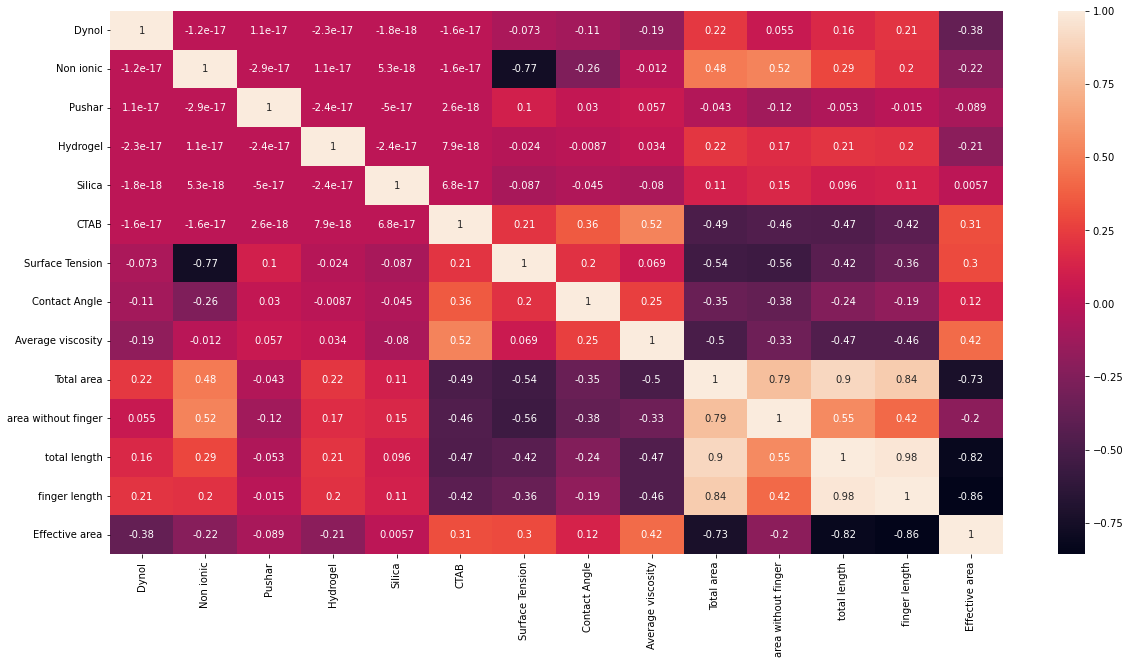

In [9]:
fig, ax = plt.subplots(figsize=(20,10))        
sns.heatmap(df.corr(),annot=True,ax=ax)

For better accuracy, considering a threshold of <b>0.9</b>, there are no such highly correlated features.

In [10]:
df.drop(['Total area','total length'],axis=1,inplace=True)

In [11]:
df.shape

(77, 12)

In [12]:
df.head()

,Dynol,Non ionic,Pushar,Hydrogel,Silica,CTAB,Surface Tension,Contact Angle,Average viscosity,area without finger,finger length,Effective area
0,0.0750,0.4,0.000,0.006250,0.00,0.2,23.47,21.58,0.060,37.303333,14.046667,1.127079
1,0.0375,0.2,0.025,0.003125,0.05,0.2,26.62,23.20,0.098,30.460000,6.400000,1.576359
2,0.0375,0.2,0.025,0.003125,0.00,0.1,27.24,25.00,0.070,30.566667,9.533333,1.523732
3,0.0000,0.0,0.000,0.006250,0.00,0.2,30.64,25.53,0.095,23.787000,5.100000,1.769078
4,0.0000,0.0,0.050,0.000000,0.10,0.2,30.75,20.12,0.060,21.433000,3.277000,2.018137


### Statistical analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 85
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dynol                77 non-null     float64
 1   Non ionic            77 non-null     float64
 2   Pushar               77 non-null     float64
 3   Hydrogel             77 non-null     float64
 4   Silica               77 non-null     float64
 5   CTAB                 77 non-null     float64
 6   Surface Tension      77 non-null     float64
 7   Contact Angle        77 non-null     float64
 8   Average viscosity    77 non-null     float64
 9   area without finger  77 non-null     float64
 10  finger length        77 non-null     float64
 11  Effective area       77 non-null     float64
dtypes: float64(12)
memory usage: 7.8 KB


In [14]:
df.describe()

,Dynol,Non ionic,Pushar,Hydrogel,Silica,CTAB,Surface Tension,Contact Angle,Average viscosity,area without finger,finger length,Effective area
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,0.037500,0.200000,0.025000,0.003125,0.050000,0.100000,26.770649,19.275779,0.083677,33.549513,10.142403,1.512754
std,0.034946,0.186378,0.023297,0.002912,0.046595,0.093189,3.204398,4.997102,0.018805,7.087782,4.633655,0.272028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.700000,9.050000,0.050000,18.750000,2.370000,0.807770
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.080000,16.360000,0.068000,28.400000,6.480000,1.326376
50%,0.037500,0.200000,0.025000,0.003125,0.050000,0.100000,25.910000,20.120000,0.084600,32.410000,9.993333,1.501660
75%,0.075000,0.400000,0.050000,0.006250,0.100000,0.200000,29.400000,22.400000,0.095000,38.166667,12.490000,1.651147
max,0.075000,0.400000,0.050000,0.006250,0.100000,0.200000,33.000000,35.000000,0.150000,53.600000,26.000000,2.123534


In [15]:
features_input = np.array(['Dynol','Non ionic','Pushar','Hydrogel','Silica','CTAB'])
features_measured = np.array(['Surface Tension','Contact Angle','Average viscosity'])
features_output = np.array(['area without finger','finger length','Effective area'])

### Checking for outliers

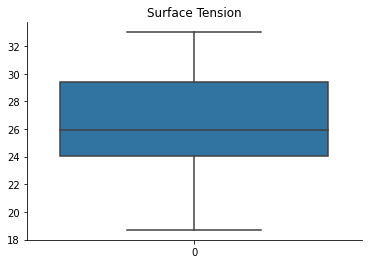

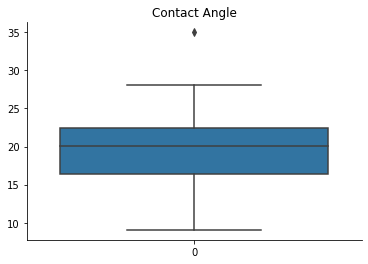

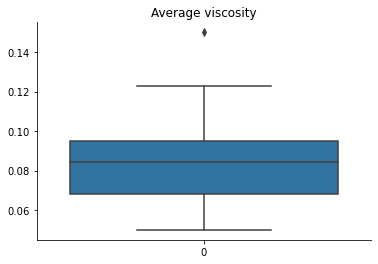

In [16]:
for features in features_measured:
    sns.boxplot(df[features])
    sns.despine()
    plt.title(features)
    plt.show()

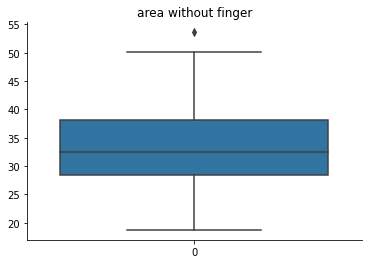

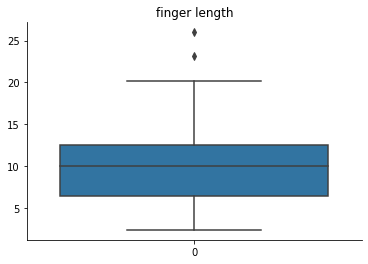

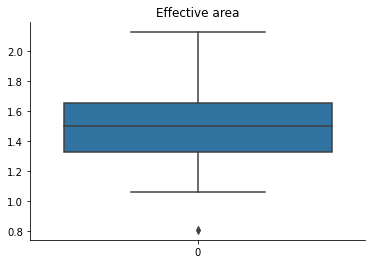

In [17]:
for features in features_output:
    sns.boxplot(df[features])
    sns.despine()
    plt.title(features)
    plt.show()

In [18]:
for features in features_measured:
    Q1 = df[features].quantile(0.25)
    Q3 = df[features].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    indu = df[(df[features]>upper)].index
    indl = df[(df[features]<lower)].index

    df = df.drop(indu,axis=0)
    df = df.drop(indl,axis=0)

In [19]:
for features in features_output:
    Q1 = df[features].quantile(0.25)
    Q3 = df[features].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    indu = df[(df[features]>upper)].index
    indl = df[(df[features]<lower)].index

    df = df.drop(indu,axis=0)
    df = df.drop(indl,axis=0)

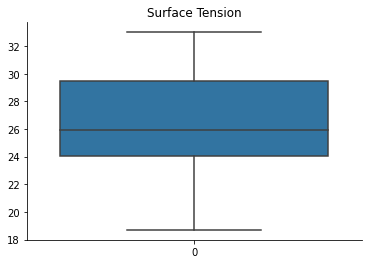

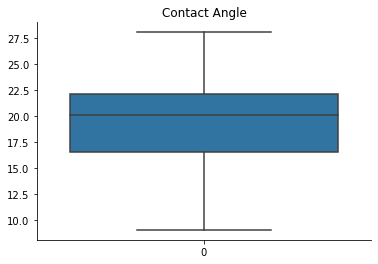

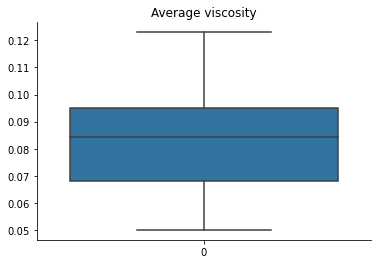

In [20]:
for features in features_measured:
    sns.boxplot(df[features])
    sns.despine()
    plt.title(features)
    plt.show()

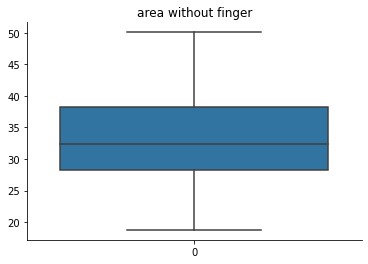

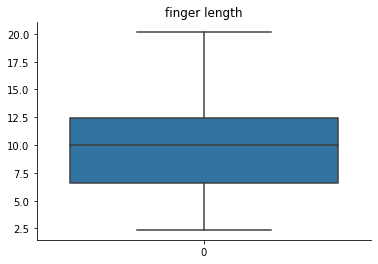

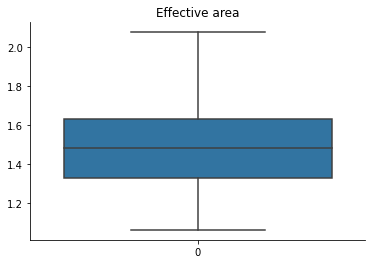

In [21]:
for features in features_output:
    sns.boxplot(df[features])
    sns.despine()
    plt.title(features)
    plt.show()

## EDA

In [23]:
# for feature1 in features_input:
#     for feature2 in features_measured:
#         x = feature1
#         y = feature2
#         sns.regplot(data=df,x=x,y=y,ci=None,color='green',line_kws={'linewidth':1,'color':'blue'})
#         sns.despine()
#         plt.title(y+' vs '+x)
#         plt.show()

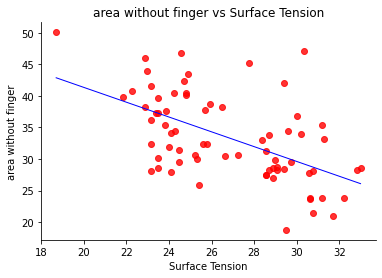

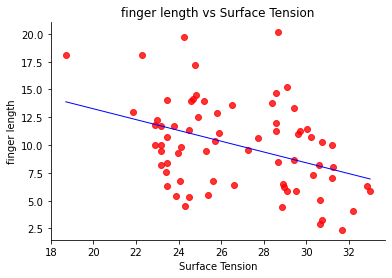

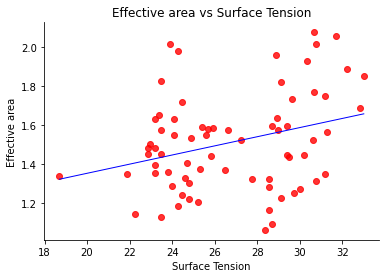

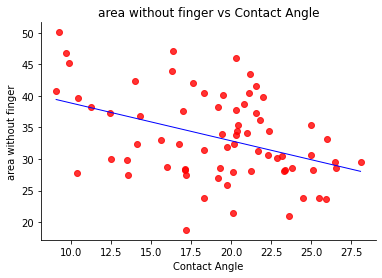

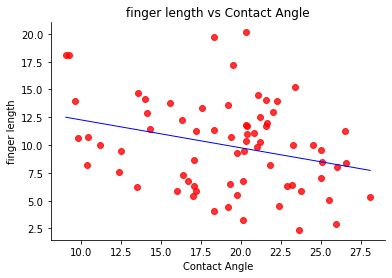

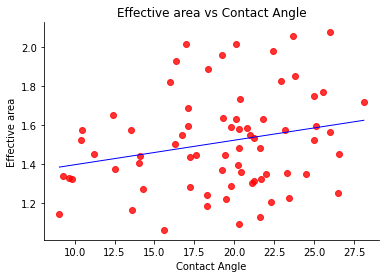

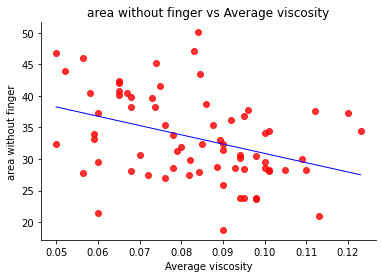

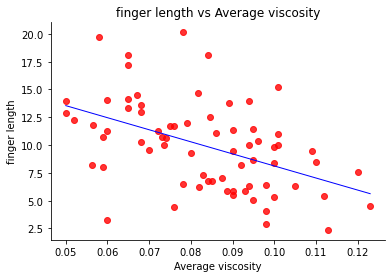

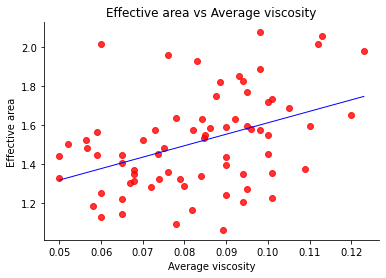

In [24]:
for feature1 in features_measured:
    for feature2 in features_output:
        x = feature1
        y = feature2
        sns.regplot(data=df,x=x,y=y,ci=None,color='red',line_kws={'linewidth':1,'color':'blue'})
        sns.despine()
        plt.title(y+' vs '+x)
        plt.show()

Surface tension, Contact angle, Average viscosity <b>inverse proportional</b> area without finger <br>
Surface tension, Contact angle, Average viscosity <b>inverse proportional</b> finger length <br>
Surface tension, Contact angle, Average viscosity <b>direct proportional</b> Effective area

In [25]:
# for feature1 in features_input:
#     for feature2 in features_output:
#         x = feature1
#         y = feature2
#         sns.regplot(data=df,x=x,y=y,ci=None,color='black',line_kws={'linewidth':1,'color':'blue'})
#         sns.despine()
#         plt.title(y+' vs '+x)
#         plt.show()

In [26]:
import scipy.cluster.hierarchy as shc
# from sklearn.preprocessing import normalize

data = df.loc[:,['Effective area','area without finger']]
# data = normalize(data)
data

# plt.figure(figsize=(10, 7))
# # plt.title("Customer Dendograms")
# dend = shc.dendrogram(shc.linkage(df, method='ward'))

,Effective area,area without finger
0,1.127079,37.303333
1,1.576359,30.460000
2,1.523732,30.566667
3,1.769078,23.787000
4,2.018137,21.433000
...,...,...
80,1.548747,34.166667
81,1.208130,30.583333
82,2.076427,23.700000
83,1.143596,40.766667


In [27]:
from sklearn.cluster import AgglomerativeClustering

# data = np.array(data).reshape(1,142)
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
labels_=cluster.fit_predict(data)
labels_


array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1])

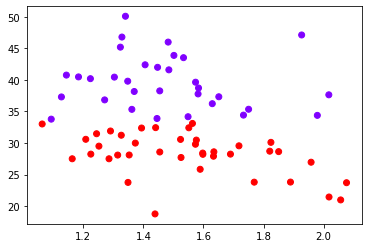

In [28]:
# plt.figure(figsize=(10, 7))
# print(data['Surface Tension'])
# print(data[:,1])
plt.scatter(data['Effective area'], data['area without finger'], c=cluster.labels_, cmap='rainbow')

In [29]:
from sklearn.metrics import silhouette_score

In [30]:

silhouette_score(data,labels_)

0.591732814670712

In [31]:
from sklearn.cluster import DBSCAN

In [32]:
dbscan = DBSCAN(eps=0.01,min_samples=6)
model = dbscan.fit(data)

In [33]:
labels = model.labels_

In [34]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

In [35]:
silhouette_score(data,labels)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

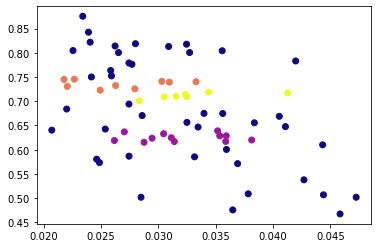

In [ ]:
plt.scatter(data['Effective area'], data['area without finger'], c=labels, cmap='plasma')